In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
tf.__version__

'2.10.0'

In [2]:
path = "dataset/brain_tumor_dataset/"

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=(0.8, 1.2),
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.1,
    fill_mode='nearest',
    height_shift_range=0.1,
    brightness_range=(0.7, 1.3),
    shear_range=0.2,
    validation_split=0.2
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [6]:
train_data = train_datagen.flow_from_directory(
    path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training'
)
val_data =  train_datagen.flow_from_directory(
    path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='validation'
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


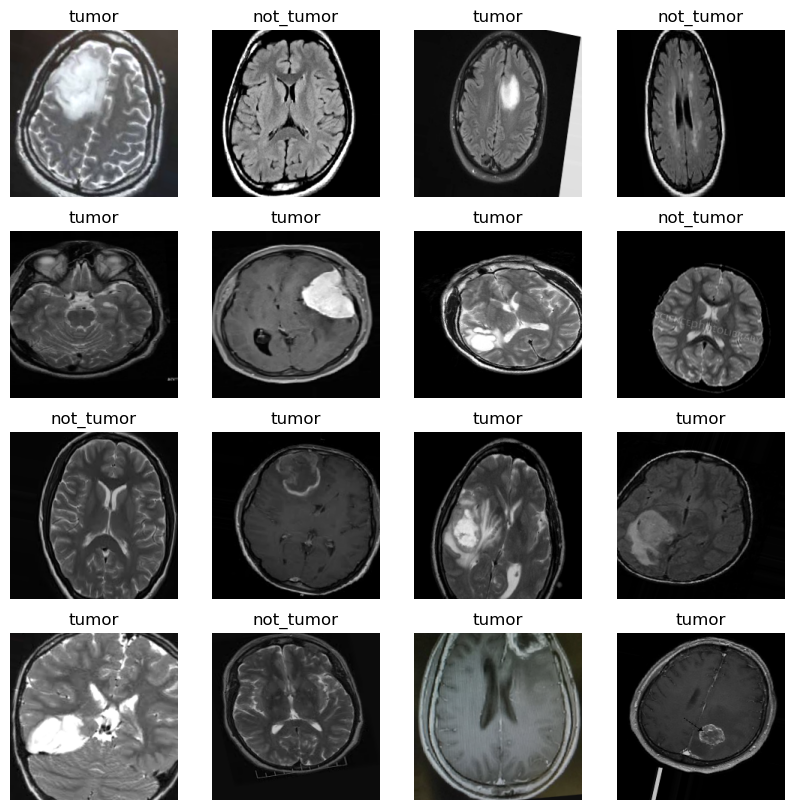

In [7]:
images, labels = next(train_data)

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title("tumor" if labels[i] == 1 else "not_tumor")
    plt.axis('off')  # Hide axis for a cleaner look
plt.show()

In [8]:
tf.keras.backend.clear_session()

# **Deep Neural Network Model**

In [10]:
model1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,3,activation='relu',padding='same'),
    tf.keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,3,activation='relu',padding='same'),
    tf.keras.layers.Conv2D(32,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,3,activation='relu',padding='same'),
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 256)    

In [14]:
# Convert train_data to tf.data.Dataset and prefetch
# train_dataset = tf.data.Dataset.from_generator(
#     lambda: train_data,
#     output_signature=(
#         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(None,), dtype=tf.float32)
#     )
# ).prefetch(buffer_size=tf.data.AUTOTUNE)

# # Convert val_data to tf.data.Dataset and prefetch
# val_dataset = tf.data.Dataset.from_generator(
#     lambda: val_data,
#     output_signature=(
#         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(None,), dtype=tf.float32)
#     )
# ).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
EPOCHS=10
history1 = model1.fit(train_data,epochs=EPOCHS,validation_data=val_data,verbose=2)

Epoch 1/10
7/7 - 22s - loss: 1.2351 - accuracy: 0.5222 - val_loss: 0.7600 - val_accuracy: 0.4200 - 22s/epoch - 3s/step
Epoch 2/10
7/7 - 3s - loss: 0.9295 - accuracy: 0.5862 - val_loss: 0.6789 - val_accuracy: 0.5200 - 3s/epoch - 417ms/step
Epoch 3/10
7/7 - 4s - loss: 0.7480 - accuracy: 0.6798 - val_loss: 0.6155 - val_accuracy: 0.6800 - 4s/epoch - 502ms/step
Epoch 4/10
7/7 - 3s - loss: 0.8375 - accuracy: 0.6650 - val_loss: 0.7261 - val_accuracy: 0.6200 - 3s/epoch - 402ms/step
Epoch 5/10
7/7 - 3s - loss: 0.6817 - accuracy: 0.6995 - val_loss: 0.7330 - val_accuracy: 0.5200 - 3s/epoch - 405ms/step
Epoch 6/10
7/7 - 3s - loss: 0.7320 - accuracy: 0.6700 - val_loss: 0.8976 - val_accuracy: 0.6200 - 3s/epoch - 478ms/step
Epoch 7/10
7/7 - 3s - loss: 0.8671 - accuracy: 0.6404 - val_loss: 0.6802 - val_accuracy: 0.6400 - 3s/epoch - 435ms/step
Epoch 8/10
7/7 - 3s - loss: 0.6081 - accuracy: 0.7143 - val_loss: 0.9887 - val_accuracy: 0.6200 - 3s/epoch - 487ms/step
Epoch 9/10
7/7 - 3s - loss: 0.6212 - accu

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs available:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs found.")

GPUs available:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
nvidia-smi

# VGG nmodel

In [14]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', input_shape=(224,224,3),include_top=False)

In [20]:
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
vggmodel = tf.keras.models.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [22]:
vggmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,977,857
Trainable params: 263,169
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
vggmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history2 = vggmodel.fit(train_data,epochs=EPOCHS,validation_data=val_data,verbose=2)

Epoch 1/10
7/7 - 13s - loss: 0.7130 - accuracy: 0.6010 - val_loss: 0.6485 - val_accuracy: 0.7200 - 13s/epoch - 2s/step
Epoch 2/10
7/7 - 3s - loss: 0.6478 - accuracy: 0.6207 - val_loss: 0.5523 - val_accuracy: 0.7200 - 3s/epoch - 450ms/step
Epoch 3/10
7/7 - 3s - loss: 0.5925 - accuracy: 0.7192 - val_loss: 0.5174 - val_accuracy: 0.8000 - 3s/epoch - 410ms/step
Epoch 4/10
7/7 - 3s - loss: 0.5361 - accuracy: 0.7783 - val_loss: 0.5033 - val_accuracy: 0.7800 - 3s/epoch - 408ms/step
Epoch 5/10
7/7 - 3s - loss: 0.5273 - accuracy: 0.7635 - val_loss: 0.4812 - val_accuracy: 0.7400 - 3s/epoch - 441ms/step
Epoch 6/10
7/7 - 3s - loss: 0.5075 - accuracy: 0.7980 - val_loss: 0.4725 - val_accuracy: 0.7800 - 3s/epoch - 434ms/step
Epoch 7/10
7/7 - 3s - loss: 0.4787 - accuracy: 0.7980 - val_loss: 0.4204 - val_accuracy: 0.7600 - 3s/epoch - 426ms/step
Epoch 8/10
7/7 - 3s - loss: 0.4504 - accuracy: 0.8276 - val_loss: 0.4627 - val_accuracy: 0.8000 - 3s/epoch - 470ms/step
Epoch 9/10
7/7 - 3s - loss: 0.4470 - accu

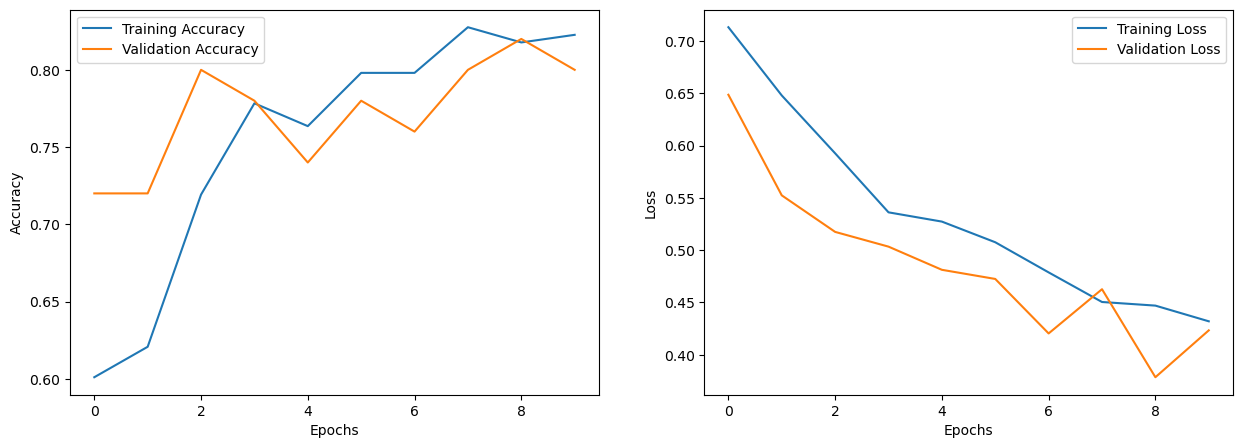

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()